##### K-Means Clustring Example
1. K-Means comes under unsupervised Machine Learning Technique
2. Terms We will use like **Cluster**,**Centroid**
3. **Cluster:** Partition Our Dataset into K Distinct Cluster
4. **Centroid:** Nearest Mean Cluster

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
X = np.array([
    [7.5, 8.0],
    [9.0, 7.0],
    [10.5, 6.5],
    [6.0, 9.0],
    [13.0, 5.5],
    [8.0, 8.5],
    [14.0, 4.5],
    [9.5, 7.0],
    [7.0, 9.0],
    [12.0, 6.0]
])

df = pd.DataFrame(X, columns=['EntryTime', 'Duration'])
print(df)

   EntryTime  Duration
0        7.5       8.0
1        9.0       7.0
2       10.5       6.5
3        6.0       9.0
4       13.0       5.5
5        8.0       8.5
6       14.0       4.5
7        9.5       7.0
8        7.0       9.0
9       12.0       6.0


In [5]:
# Create Model
model=KMeans(n_clusters=3,random_state=0)

In [17]:
df['Cluster']=model.fit_predict(df[['EntryTime','Duration']])
df['Cluster'] = model.labels_
center=model.cluster_centers_
df

C:\Users\Nurhidayah R\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,EntryTime,Duration,Cluster
0,7.5,8.0,0
1,9.0,7.0,2
2,10.5,6.5,2
3,6.0,9.0,0
4,13.0,5.5,1
5,8.0,8.5,0
6,14.0,4.5,1
7,9.5,7.0,2
8,7.0,9.0,0
9,12.0,6.0,1


In [19]:
centers = model.cluster_centers_

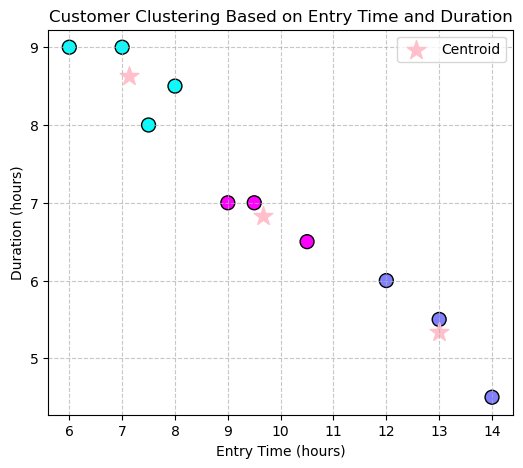

In [20]:
plt.figure(figsize=(6,5))
plt.scatter(df['EntryTime'], df['Duration'], c=df['Cluster'], cmap='cool', s=100, edgecolor='black')
plt.scatter(centers[:,0], centers[:,1], marker='*', s=200, c='pink', label='Centroid')
plt.title('Customer Clustering Based on Entry Time and Duration')
plt.xlabel('Entry Time (hours)')
plt.ylabel('Duration (hours)')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##### **Exercise 2**
##### Lab: Customer Segmentation using K-Means
##### **Goal**: Group Customers by Annual Income and Spending Score
1. Load Data from customers.csv
2. Visualize the Data
3. Cluster
4. Interpret Each Segment like 'High Income/High Spender;
5. Create Scatter Plot 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
df=pd.read_csv('customers.csv')
df.head()

,CustomerID,AnnualIncome,SpendingScore
0,1,15,79
1,2,16,81
2,3,17,76
3,4,18,75
4,5,19,73


In [50]:
kmeans = KMeans(n_clusters=4, random_state=0)
df['Cluster'] = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

In [51]:
X=df[['AnnualIncome', 'SpendingScore']]
kmeans = KMeans(n_clusters=4, random_state=0)

In [47]:
kmeans.fit(X)

KMeans(n_clusters=4, random_state=0)

In [31]:
df['Cluster'] = kmeans.labels_
centers = kmeans.cluster_centers_

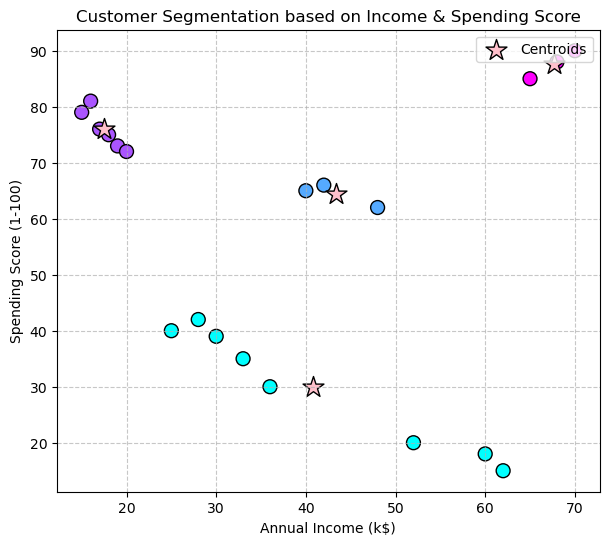


Cluster 0 Summary:
Average Income: 40.8k$
Average Spending Score: 29.9

Cluster 1 Summary:
Average Income: 43.3k$
Average Spending Score: 64.3

Cluster 2 Summary:
Average Income: 17.5k$
Average Spending Score: 76.0

Cluster 3 Summary:
Average Income: 67.7k$
Average Spending Score: 87.7


In [35]:
plt.figure(figsize=(7,6))
plt.scatter(df['AnnualIncome'], df['SpendingScore'],
            c=df['Cluster'], cmap='cool', s=100, edgecolor='black')
plt.scatter(centers[:,0], centers[:,1], marker='*', s=250, c='pink', edgecolor='black', label='Centroids')

plt.title('Customer Segmentation based on Income & Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show() 

for i in range(4):
    subset = df[df['Cluster'] == i]
    print(f"\nCluster {i} Summary:")
    print(f"Average Income: {subset['AnnualIncome'].mean():.1f}k$")
    print(f"Average Spending Score: {subset['SpendingScore'].mean():.1f}")